# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

> Indented block



**Business Context**

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]

**Objective**

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:


1.  Do the users spend more time on the new landing page than on the existing
landing page?
2.  Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

3.  Does the converted status depend on the preferred language?

4.  Is the time spent on the new page the same for the different language users?

**Data Dictionary**

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

  1.  user_id - Unique user ID of the person visiting the website

  2. group - Whether the user belongs to the first group (control) or the second group (treatment)

  3. landing_page - Whether the landing page is new or old

  4. time_spent_on_the_page - Time (in minutes) spent by the user on the landing page

  5. converted - Whether the user gets converted to a subscriber of the news portal or not

  6. language_preferred - Language chosen by the user to view the landing page


## Import all the necessary libraries

In [93]:
# import the important packages
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
%matplotlib inline

import scipy.stats as stats # this library contains a large number of probability distributions as well as a growing library of statistical functions.

## Reading the Data into a DataFrame

In [94]:
# read the data
data = pd.read_csv('abtest.csv')
df=data.copy()

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [95]:
# return the first five rows
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [96]:
# retirn the last five rows
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [97]:
# returns the number of rows by the number of columns
df.shape

(100, 6)

Observations:

There are 100 columns and 6 rows in the dataset.

In [98]:
# print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


Observations:


*   There are 2 numerical columns and 4 object type columns in the data.
*   All columns have 100 observations which represent that there is no missing value within the data.

*   'User_id' and 'time_spent_on_the_page' columns are numerical while rest of the columns contain categorical data.
  





In [99]:
# check missing values across each columns
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

#### Observations:
There is no any missing value in data.

In [100]:
# check statistical summary of the all data
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,100.0,NaN,NaN,NaN,546517.0,52.295779,546443.0,546467.75,546492.5,546567.25,546592.0
group,100,2,control,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landing_page,100,2,old,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_spent_on_the_page,100.0,NaN,NaN,NaN,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71
converted,100,2,yes,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_preferred,100,3,Spanish,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observations:


*   There are 2 unique values for 'group', 'landing_page' and 'converted' columns while there are 3 unique values for 'language_prefered' column.

*  Most prefered language is Spanish with a count of 34 out of 100.
*  54 out of 100 readers converted to subscription.




In [101]:
# check statistical summary of the numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


Observations:


* Average time users spent on landing page is about 5.4 min
* Median value for the time users spenton the landing page is also about 5.4

*   This information suggest that the 'time_spend_on_the_page' data follows normal distribution. Further analysis should be done to be sure.
*   The lowest and maximum time users spent on the landing page are 0.19 and 10.71 minutes respectively.


*   Statistical summary of 'user_id' is not relevant since 'user_id' column has the data of Unique user ID of the each person visiting the website.








In [102]:
# check for duplicates
duplicates = df.duplicated()
# print the duplicated rows
print(df[duplicates])


Empty DataFrame
Columns: [user_id, group, landing_page, time_spent_on_the_page, converted, language_preferred]
Index: []


Observation:

There are no dublicates in the data frame.

### Univariate Analysis

**Lets check the distribution for columns that has numerical data first!**

Observations on Time Spent on the Landing Page

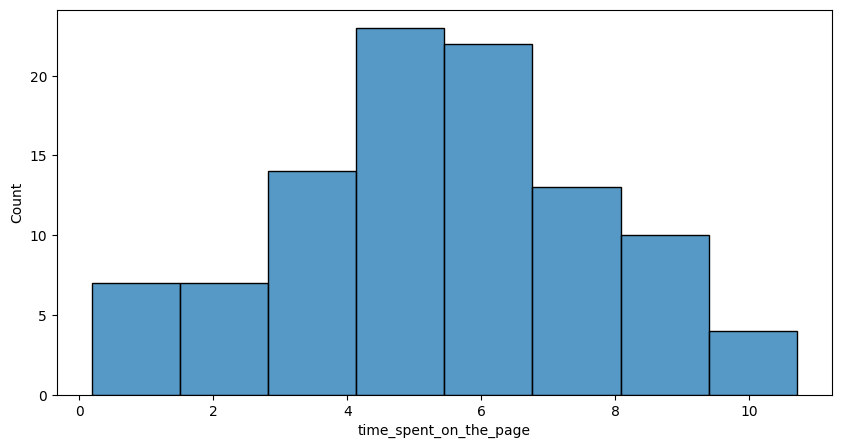

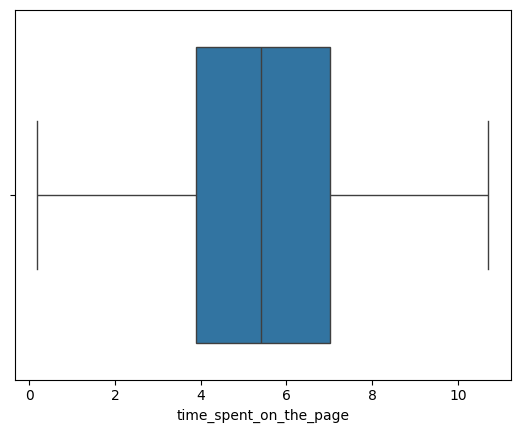

In [103]:
plt.figure(figsize = (10,5))
sns.histplot(data=df,x='time_spent_on_the_page')
plt.show()
sns.boxplot(data=df,x='time_spent_on_the_page')
plt.show()

In [104]:
# lets find the average time spent by users on the landing page
df['time_spent_on_the_page'].mean()

5.377800000000001

In [105]:
# lets find the median time spent by users on the landing page
df['time_spent_on_the_page'].median()

5.415

Observations:


*   The distribution is normal dsitribution.

*   There are no outliers.

*   The average and median time that users spent on the landing page is about 5.4 min






**Now, lets check the distribution for other columns.**

Observations on Groups

In [106]:
# find counts of each group
df['group'].value_counts()

group
control      50
treatment    50
Name: count, dtype: int64

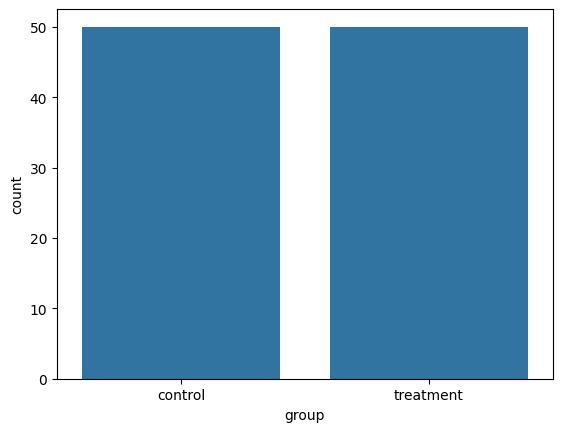

In [107]:
sns.countplot(data=df,x='group')
plt.show()

Observations:


*  There are two different groups that are control and treatment groups.
*  Each group has 50 users.

Observations on Landing Page

In [108]:
# lets find counts of each group
df['landing_page'].value_counts()


landing_page
old    50
new    50
Name: count, dtype: int64

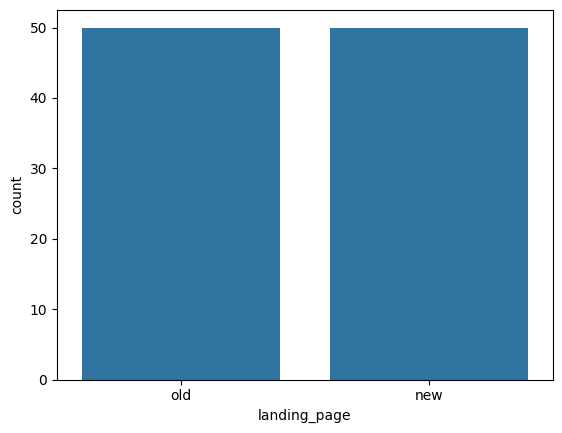

In [109]:
sns.countplot(data=df,x='landing_page')
plt.show()

Observations:


*   There are two type of landing pages; new and old.
*   There are 50 users for each type of landing page.





Observations on Converted

In [110]:
# lets find the counts of each group
df['converted'].value_counts()

converted
yes    54
no     46
Name: count, dtype: int64

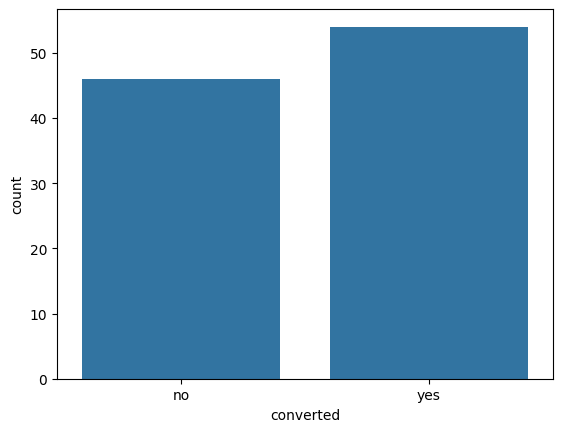

In [111]:

sns.countplot(data=df,x='converted')
plt.show()

Observations:


*   There are two groups of data within 'converted' column that are 'Yes' and 'No'.
*   There are more users (54) converted to a subscriber than users are not converted (46)



Observations on Language Preferred

In [112]:
# lets find the counts of each different language preferred
df['language_preferred'].value_counts()

language_preferred
Spanish    34
French     34
English    32
Name: count, dtype: int64

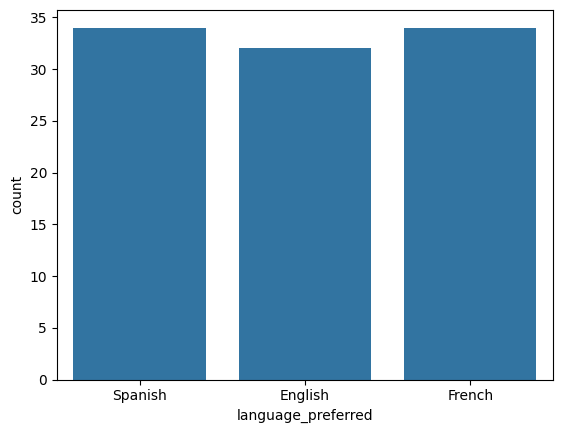

In [113]:
sns.countplot(data=df,x='language_preferred')
plt.show()

Observations:


*   Spanish (34 users) and French (34 users) are preferred slightly more than English (32 users).




### Bivariate Analysis

Relationship between landing page and time spent on the landing page

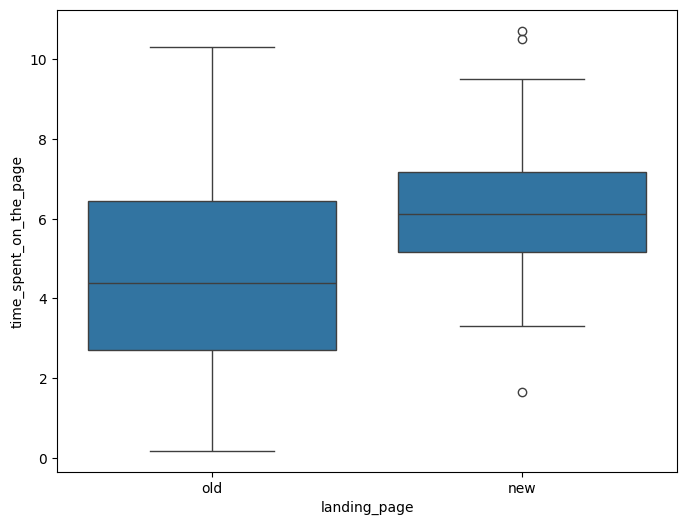

In [114]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page')
plt.show()

In [115]:
# find avearage time users spent on new and old landing page
df.groupby(['landing_page'])['time_spent_on_the_page'].mean()

landing_page
new    6.2232
old    4.5324
Name: time_spent_on_the_page, dtype: float64

In [116]:
# find median time users spent on new and old landing page
df.groupby(['landing_page'])['time_spent_on_the_page'].median()

landing_page
new    6.105
old    4.380
Name: time_spent_on_the_page, dtype: float64

Observations:


*   Average time users spent on new landing page (6.22 min) is longer than the users spent on old landing page (4.53 min).

*   Median of the time users spent on new landing page (6.10 min) is longer than the users spent on old landing page (4.38 min).


*  There are outliers for the data time spent on the new page.

*  The range of time spent on the old page is greater than that of the new page. This indicates that the time users spend on the old page exhibits a wider range of variability, spanning from 0 to 10





Relationship between conversion status and time spent on the landing page

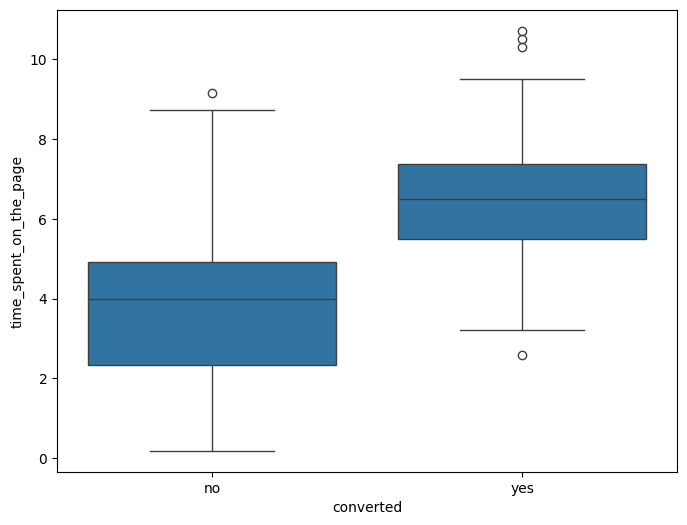

In [117]:
plt.figure(figsize=(8, 6))
sns.boxplot(data = df, x ='converted', y = 'time_spent_on_the_page')
plt.show()

In [118]:
# find average time users spent based on conversion status
df.groupby(['converted'])['time_spent_on_the_page'].mean()

converted
no     3.915870
yes    6.623148
Name: time_spent_on_the_page, dtype: float64

In [119]:
# find median time users spent on based on conversion status
df.groupby(['converted'])['time_spent_on_the_page'].median()

converted
no     3.980
yes    6.495
Name: time_spent_on_the_page, dtype: float64

Observations:


*   Average time users who converted to a subscriber spent (6.62 min) is longer than the time users who are not converted spent (3.91 min).

*   Median of the time users who converted to a subscriber spent (6.49 min) is longer than the time users who are not converted spent (3.98 min).


*  There are outliers for the data time spent by users who are converted to a subscriber.

*  Overall, we observe that users who converted to a subscriber spent more time on the landing page. Further analysis has to be done to be able to conclude.





Relationship between language preferred and time spent on the landing page

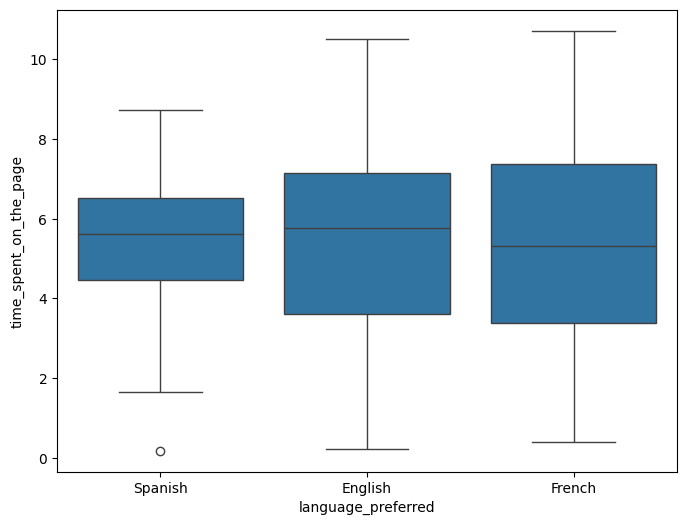

In [120]:
plt.figure(figsize=(8, 6))
sns.boxplot(data = df, x = 'language_preferred', y = 'time_spent_on_the_page')
plt.show()

Observations:


*  Median value of time spent on the landing page by users who preferred French is slightly lower than the median value of the time spent on the landing page by users who preferred English and Spanish.
*   Median value of time spent on the landing page by users who preferred Spanish and English are close.


*   The range of time spent by users who preferred Spanish is narrower compared to the range observed for English and French preferences. This suggests that the time spent by Spanish-preferred users shows less variability across the data.







## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

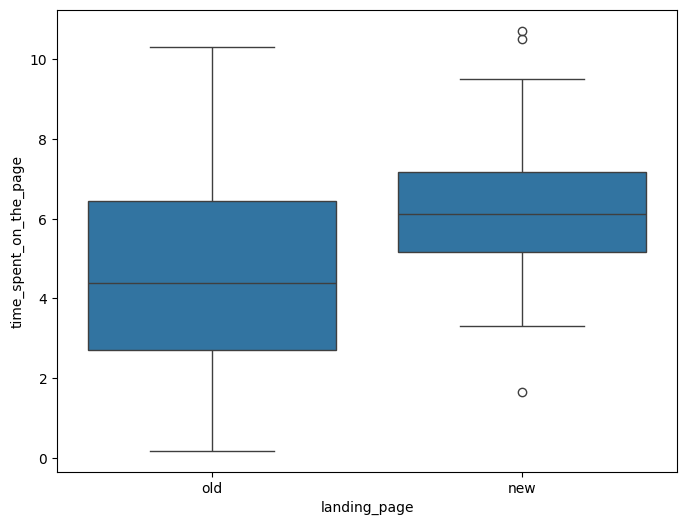

In [121]:
# lets reshow the visual analysis of time spent on each type of the landing pages
plt.figure(figsize=(8,6))
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page')
plt.show()

### Step 1: Define the null and alternate hypotheses

Lets define null and alternate hypotheses!

Let $\mu$ be the mean time users spend on the current landing page.

We will test the null hypothesis

 >$H_0$: $\mu$ = 4.5 min

against the alternate hypothesis

>$H_a$: $\mu$> 4.5 min



### Step 2: Select Appropriate test

We will use one tailed test that compare two populations means from two independent populations.

First, lets find the sample means and sample standard deviations for the two samples.

In [122]:
# find the sample means and sample standard deviations for the two samples
print('The mean time spent on the new landing page is ' + str(df[df['landing_page'] == 'new']['time_spent_on_the_page'].mean()))
print('The mean time spent on the old landing page is ' + str(df[df['landing_page'] == 'old']['time_spent_on_the_page'].mean()))
print('The standard deviation of the time spent on the new landing page is ' + str(round(df[df['landing_page'] == 'new']['time_spent_on_the_page'].std(),2)))
print('The standard deviation of the time spent on the old landing page is ' + str(round(df[df['landing_page'] == 'old']['time_spent_on_the_page'].std(),2)))


The mean time spent on the new landing page is 6.2232
The mean time spent on the old landing page is 4.532400000000001
The standard deviation of the time spent on the new landing page is 1.82
The standard deviation of the time spent on the old landing page is 2.58


### Let's test whether the T-test assumptions are satisfied or not

* Continuous data - Yes, the time spent on the landing page is on a continuous scale.
* Normally distributed populations - Yes, we are informed that the populations are assumed to be normal. Moreover, n=50, greater than 30, assure that the distribution is normal because of the Central Limit Theorem.
* Independent populations - As the samples are random samples for two different groups, these two samples are from two independent populations.
* Unequal population standard deviations - As the sample standard deviations are different (1.82 and 2.58), the population standard deviations may be assumed to be different.
* Random sampling from the population - Yes, we are given that the collected sample a simple random sample.

Therefore, we can use two sample T-test for this problem.



### Step 3: Decide the significance level

The significance level is given as 5 % in the problem.

Therefore, we choose $\alpha = 0.05$.

### Step 4: Collect and prepare data

In [123]:
# first create new dataframe for both new and old landing page users.
time_spent_on_new_page=df[df['landing_page'] == 'new']['time_spent_on_the_page']
time_spent_on_old_page=df[df['landing_page'] == 'old']['time_spent_on_the_page']

In [124]:
# find the sample means and sample standard deviations for the two samples
print('The mean time spent on the new landing page is ' + str(round(time_spent_on_new_page.mean(),2)))
print('The mean time spent on the old landing page is ' + str(round(time_spent_on_old_page.mean(),2)))
print('The standard deviation of the time spent on the new landing page is ' + str(round(time_spent_on_new_page.std(),2)))
print('The standard deviation of the time spent on the old landing page is ' + str(round(time_spent_on_old_page.std(),2)))


The mean time spent on the new landing page is 6.22
The mean time spent on the old landing page is 4.53
The standard deviation of the time spent on the new landing page is 1.82
The standard deviation of the time spent on the old landing page is 2.58


The standard deviation of the time spent on the new landing page is found as 1.82.

And the standard deviation of the time spent on the old landing page is found as 2.58.

Therefore, we can conclude that the population standard deviations can be assumed not equal since 1.82 and 2.58 are not close enough.

### Step 5: Calculate the p-value

The [`ttest_ind()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) function of Scipy will be used to compute the test statistic and p-value.

In [125]:
# lets import the required function
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(time_spent_on_new_page, time_spent_on_old_page, equal_var = False , alternative = 'greater')
print('The p-value is', p_value)

The p-value is 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [126]:
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is evidence that time spent on new landing page is greater.")
else:
    print("Fail to reject the null hypothesis. No significant evidence of a difference in time spent in new and old landing pages.")

Reject the null hypothesis. There is evidence that time spent on new landing page is greater.


### Step 7:  Draw inference

The p-value, around 0.0001, is smaller than our set significance level of 0.05. This means we can reject the null hypothesis. So, we have strong evidence that users spend more time on the new landing page than the old one.

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

Lets start with collecting and preparing data

In [127]:
# Filter the DataFrame based on conditions
new_page_users_converted = df[(df['landing_page'] == 'new') & (df['converted'] == 'yes')]

# Get the count of users who fit the criteria
num_new_page_users_converted = len(new_page_users_converted)

# Print the result
print(f"Number of new landing page users converted to subscribers: {num_new_page_users_converted}")

Number of new landing page users converted to subscribers: 33


In [128]:
# Filter the DataFrame based on conditions
old_page_users_converted = df[(df['landing_page'] == 'old') & (df['converted'] == 'yes')]

# Get the count of users who fit the criteria
num_old_page_users_converted = len(old_page_users_converted)

# Print the result
print(f"Number of old landing page users converted to subscribers: {num_old_page_users_converted}")

Number of old landing page users converted to subscribers: 21


In [129]:
# lets find the conversion rate for both new page and old page
old_users = df.group.value_counts()['control'] # total number of users in the control group
new_users = df.group.value_counts()['treatment'] # total number of users in the treatment group
old_conversion_rate = (num_old_page_users_converted / old_users) * 100
new_conversion_rate = (num_new_page_users_converted / new_users) * 100

# Print the conversion rates
print(f"Old Page Conversion Rate: {old_conversion_rate:.2f}%")
print(f"New Page Conversion Rate: {new_conversion_rate:.2f}%")

Old Page Conversion Rate: 42.00%
New Page Conversion Rate: 66.00%


In [130]:
conversion_rates = {
    'old_conversion_rate': 0.42,  # Replace with actual conversion rate for old page
    'new_conversion_rate': 0.66  # Replace with actual conversion rate for new page
}


###Perform Visual Analysis

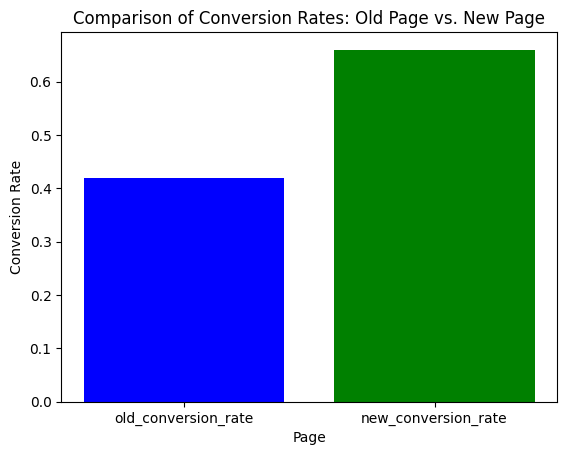

In [131]:
# Extract labels and conversion rates from the dictionary
labels = list(conversion_rates.keys())
values = list(conversion_rates.values())

# Create a bar chart
plt.bar(labels, values, color=['blue', 'green'])

# Add labels and title
plt.xlabel('Page')
plt.ylabel('Conversion Rate')
plt.title('Comparison of Conversion Rates: Old Page vs. New Page')

# Show the plot
plt.show()


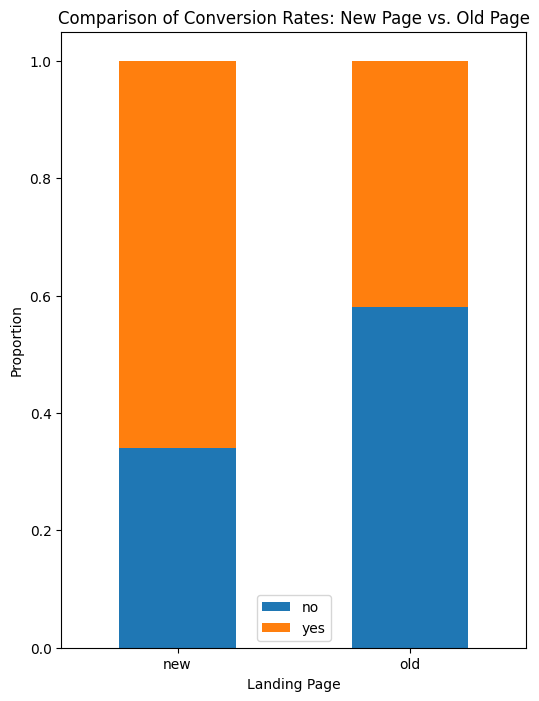

In [132]:

# lets compare the conversion rate for the new page and the conversion rate for the old page
pd.crosstab(df['landing_page'], df['converted'], normalize='index').plot(kind="bar", figsize=(6, 8), stacked=True)
plt.legend()
plt.title('Comparison of Conversion Rates: New Page vs. Old Page')
plt.xlabel('Landing Page')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()


### Step 1: Define the null and alternate hypotheses


Let $p_1,p_2$ be the proportions of users who visit the landing page and get converted for the new page and the old page respectively.

We will test the null hypothesis

>$H_0:p_1 =p_2$

against the alternate hypothesis

>$H_a:p_1 < p_2$

### Step 2: Select Appropriate test

 We will use a one-tailed test concerning two population proportions from two independent populations.

### Let's test whether the Z-test assumptions are satisfied or not

*   Binomally distributed population - Yes, a users were either on new page or old page..
*   Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.  
*   Can the binomial distribution approximated to normal distribution - Yes. For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively.
>$np_1 = 50\cdot 0.42 = 21 \geq 10 \\
n(1-p_1) = 50 \cdot 0.58 =26\geq 10 \\
np_2 = 50\cdot 0.66 =33 \geq 10\\
n(1-p_2) = 50\cdot 0.44 =22 \geq 10 $


### Step 3: Decide the significance level

The significance level is given as 5 % in the problem.

Therefore, we choose $\alpha = 0.05$.

### Step 4: Calculate the p-value

The proportions_ztest() function of statmodels will be used to compute the test statistic and p-value.

In [133]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# set the counts of defective items
converted_count = np.array([33, 21])

# set the sample sizes
nobs = np.array([50, 50])

# find the p-value
test_stat, p_value = proportions_ztest(converted_count, nobs, alternative='larger')
print('The p-value is ' + str(p_value))

The p-value is 0.008026308204056278


###Step 5: Compare the p-value with $\alpha$

In [134]:
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is evidence that conversion rate for the new page greater than the conversion rate for the old page.")
else:
    print("Fail to reject the null hypothesis. No significant evidence of conversion rate for the new page greater than the conversion rate for the old page")

Reject the null hypothesis. There is evidence that conversion rate for the new page greater than the conversion rate for the old page.


###Step 6: Draw inference

As the p-value is less than the significance level 0.05, we can reject the null hypothesis. Thus, we have enough statistical significance to conclude that conversion rate for the new page greater than the conversion rate for the old page.

## 3. Is the conversion and preferred language are independent or related?

Lets start collecting and preparing data

In [135]:
# create a contingency table showing the distribution of the two categorical variables
contingency_table = pd.crosstab(df['converted'], df['language_preferred'])
contingency_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


###Perfom Visual Analysis

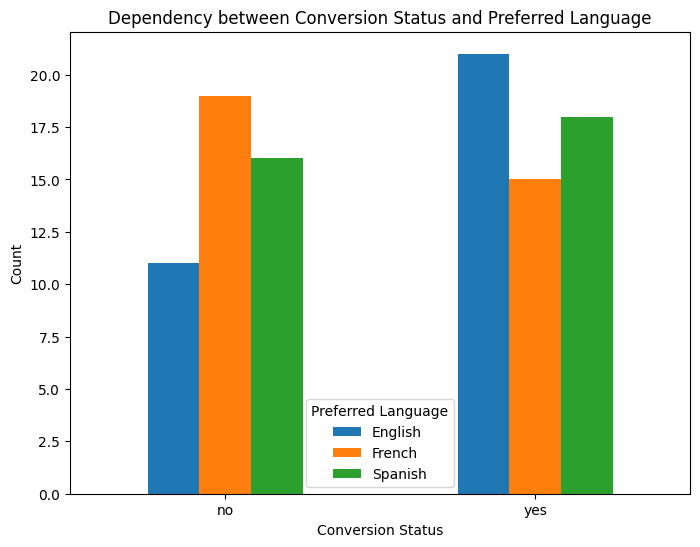

In [136]:
# create a bar chart of the contingency table
contingency_table.plot(kind="bar", figsize=(8, 6))
plt.title('Dependency between Conversion Status and Preferred Language')
plt.xlabel('Conversion Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Preferred Language')
plt.show()


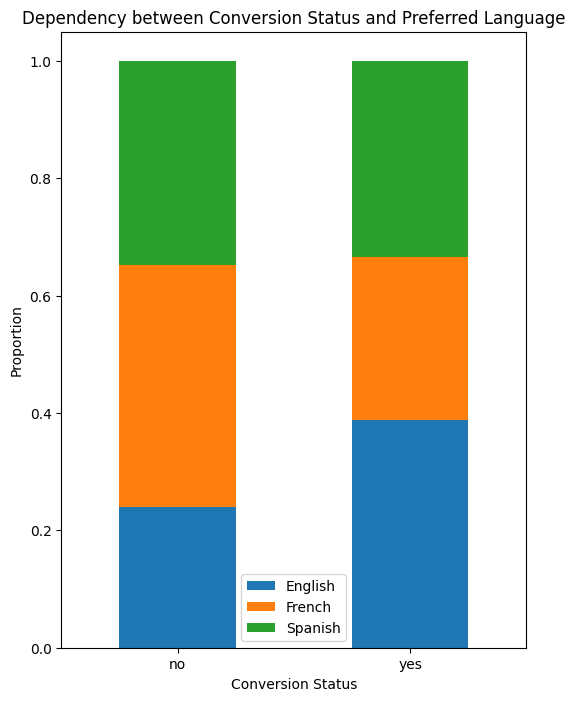

In [137]:
# lets visually plot the dependency between conversion status and preferred language with another way
pd.crosstab(df['converted'], df['language_preferred'], normalize='index').plot(kind="bar", figsize=(6, 8), stacked=True)
plt.legend()
plt.title('Dependency between Conversion Status and Preferred Language')
plt.xlabel('Conversion Status')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()


### Step 1: Define the null and alternate hypotheses

Let's write the null and alternative hypothesis


We will test the null hypothesis

>$H_0:$ Conversion is independent of preferred language.

against the alternate hypothesis

>$H_a:$ Conversion depends on preferred language.

### Let's test whether the assumptions are satisfied or not

* Categorical variables - Yes
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

###Step 2: Select Appropriate Test

This is a problem of the test of independence, concerning two categorical variables - converted status and preferred language.
Therefore, we will use the [`chi2_contingency()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) function of Scipy will be used to compute the test statistic and p-value.

###Step 3: Decide the significance level

The significance level is given as 5 % in the problem.

Therefore, we choose $\alpha = 0.05$.

###Step 4: Calculate the p-value

The significance level is given as 5 % in the problem.

Therefore, we choose $\alpha = 0.05$.

In [138]:
# perform the Chi-Square test of independence
from scipy.stats import chi2_contingency
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# print the Chi-Square test results
print("Chi-Square Value:", chi2)
print("P-Value:", p_value)


Chi-Square Value: 3.0930306905370837
P-Value: 0.21298887487543447


### Step 5:  Compare the p-value with $\alpha$

In [139]:
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is evidence that conversion depends on preferred language.")
else:
    print("Fail to reject the null hypothesis. No significant evidence of conversion depends on preferred language.")

Fail to reject the null hypothesis. No significant evidence of conversion depends on preferred language.


###Step 6: Draw inference

As the p-value is greater than the significance level 0.05, we can not reject the null hypothesis. Thus, we dont have enough statistical significance to conclude that conversion depends on preferred language.

## 4. Is the time spent on the new page same for the different language users?

Lets start with visualizing the data first!

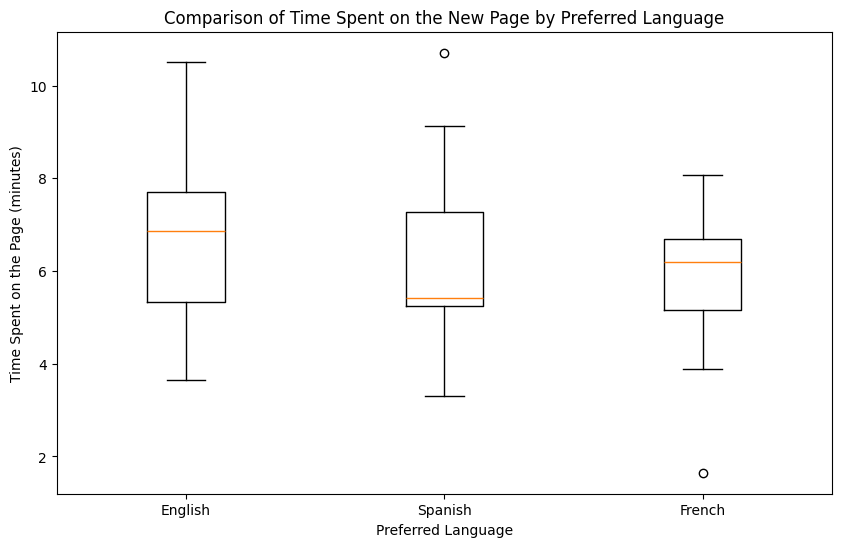

In [140]:
# filter data for the new page and get relevant columns
df_new_page_data= df[df['landing_page'] == 'new'][['time_spent_on_the_page', 'language_preferred']]

# create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot([group[1] for group in df_new_page_data.groupby('language_preferred')['time_spent_on_the_page']], labels=df_new_page_data['language_preferred'].unique())
plt.title('Comparison of Time Spent on the New Page by Preferred Language')
plt.xlabel('Preferred Language')
plt.ylabel('Time Spent on the Page (minutes)')
plt.show()


In [141]:
# calculate the mean time spent on the new page for different language users
df_new_page_data.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

###Step 1: Define the null and alternate hypotheses

Let's write the null and alternative hypothesis

Let $\mu_1, \mu_2, \mu_3$ be the means of time spent on the new landing page for preferred languages English, Spanish and French respectively.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least one time spent on the new page is different from the rest.

### Step 2: Select Appropriate test

To determine if the time spent on the new page is the same for users of different languages, we can perform an analysis of variance (ANOVA) test. This test will help us assess whether there are significant differences in the mean time spent on the new page among users with different preferred languages.

### Step 3: Decide the significance level

The significance level is given as 5 % in the problem.

Therefore, we choose $\alpha = 0.05$.

###Step 4: Calculate the p-value

In [142]:
from scipy.stats import f_oneway

# perform ANOVA test
languages = df['language_preferred'].unique()
anova_results = {}
for lang in languages:
    lang_data = df_new_page_data[df_new_page_data['language_preferred'] == lang]['time_spent_on_the_page']
    anova_results[lang] = lang_data

f_statistic, p_value = f_oneway(*anova_results.values())

# Print ANOVA results
print("ANOVA F-Statistic:", f_statistic)
print("P-Value:", p_value)

ANOVA F-Statistic: 0.8543992770006822
P-Value: 0.43204138694325955


### Step 5: Compare the p-value with $\alpha$

In [144]:
# interpret the results
if p_value < 0.05:
    print("There are significant differences in time spent on the new page among different language users.")
else:
    print("There are no significant differences in time spent on the new page among different language users.")

There are no significant differences in time spent on the new page among different language users.


### Step 6:  Draw inference

As the p-value is greater than the significance level 0.05, we can not reject the null hypothesis. Thus, we dont have enough statistical significance to conclude that time spent on the new page is not same for different language users.

## Conclusion and Business Recommendations

In the pursuit of expanding its subscriber base, E-news Express conducted a comprehensive analysis of its landing page design and user engagement. Through a well-structured A/B testing approach, the effectiveness of the new landing page was rigorously evaluated. The insights derived from this analysis have provided valuable insights into user behavior and preferences, offering actionable guidance for optimizing the user experience and boosting subscription rates.

###Key Findings:

  Engagement Enhancement with New Landing Page:

  The investigation into user engagement metrics on the old and new landing pages indicated a significant difference in the mean time users spent on the respective pages. The p-value of 0.0001, which is below the chosen significance level of 0.05, allowed us to confidently reject the null hypothesis. This finding emphasizes that users show a higher mean time spent on the new landing page compared to the old page. The enhanced engagement on the new landing page underscores the positive impact of the redesigned outline and more relevant content.

  Conversion Rate Boost with New Page:

  The analysis of conversion rates between the old and new landing pages revealed a noteworthy trend. With a p-value lower than the significance level of 0.05, we rejected the null hypothesis and established statistical significance. This outcome enables us to conclude that the conversion rate for the new landing page surpasses that of the old landing page. This insight substantiates the efficacy of the new design in encouraging user conversions and subscription actions.

  Preferred Language's Influence on Conversion:

   Examining the relationship between preferred language and conversion status, the analysis demonstrated a p-value greater than 0.05, leading us to retain the null hypothesis. Consequently, we found insufficient evidence to support the assertion that the preferred language significantly impacts the conversion status. This suggests that the choice of language may not be a decisive factor in user conversion behavior.

  Time Spent on New Page by Different Language Users:

  The investigation into time spent on the new page among users with different preferred languages yielded a p-value greater than 0.05. Consequently, we failed to reject the null hypothesis, indicating a lack of statistical significance to conclude that time spent on the new page varies significantly based on preferred languages. This insight implies that the new page's engagement potential remains consistent across diverse language preferences.



###Business Recommendations:

  Prioritize New Landing Page Deployment:

  The data-driven evidence overwhelmingly supports the adoption of the new landing page design. The increased time spent and enhanced conversion rate on the new page signify its effectiveness in driving user engagement and subscriptions. E-news Express should prioritize the deployment of the new landing page across its platform to capitalize on these positive outcomes.

  Continual Monitoring and Iteration:

  While the new landing page showcases promising results, it's imperative to maintain a culture of continuous improvement. Regularly monitor user engagement metrics, conversion rates, and user feedback. Use these insights to make iterative adjustments to the landing page's design, content, and user experience.

  Language-Neutral Conversion Strategies:

  The analysis suggests that preferred language does not significantly impact user conversions. Thus, E-news Express can focus on language-neutral conversion strategies. These strategies may include optimizing the subscription call-to-action, refining content presentation, and leveraging multimedia elements to engage users irrespective of their language preferences.

  Personalization and User Segmentation:

  While language preference may not directly impact conversion, it's still valuable for personalization. Utilize preferred language information to tailor content recommendations and user experiences. Effective personalization can foster deeper engagement and a sense of user-centricity.

In conclusion, E-news Express stands poised to harness the insights gathered from this analysis to propel its growth trajectory. By embracing the new landing page, continuously refining strategies, and leveraging user data, the company can nurture a vibrant community of engaged subscribers and remain at the forefront of the e-news industry.

___